In [1]:
import pickle
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import sklearn
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7.5))

<Figure size 864x540 with 0 Axes>

<Figure size 864x540 with 0 Axes>

step 1: Statistical user information - based on interest grouping 
step 2: draw aggregated graphs for the counted users according to category vectors 
step 3: draw histograms about the distribution of user bias

In [2]:

user_info_path = 'data/interests_user_info_dict_2000.pkl'
kmeans_path = 'data/kmeans/kmean_model.pkl'
behavior_path = 'data/behaviors_new_with_kmeans_labels.tsv'
nid2category_path = 'data/kmeans/nid2category.pkl'
category2idx_path = 'data/kmeans/category2idx.pkl'

In [3]:

with open(user_info_path, 'rb') as f:
    user_info_dict = pickle.load(f)


In [4]:
uid_list = []
for k, v in user_info_dict.items():
    uid_list.extend(v['uid'].tolist())
print(len(uid_list))

20000


In [5]:

behavior_df = pd.read_csv(behavior_path, sep='\t', header=None)
behavior_df.columns = ['idx', 'uid', 'date', 'history', 'impression', 'labels']


In [6]:
behavior_df.shape

(333948, 6)

In [7]:
interest_behavior_df = behavior_df[behavior_df['uid'].isin(uid_list)]

In [8]:
interest_behavior_df.shape

(20000, 6)

In [9]:
interest_behavior_df.head()

,idx,uid,date,history,impression,labels
0,2,U231077,11/19/2019 5:28:08 AM,N45124 N84730 N45128 N104312 N70022 N99111 N26...,N14657 N51253 N49521 N126571 N74286 N101071 N1...,2
6,17,U36211,11/22/2019 11:09:00 PM,N65259 N81692 N11397 N76677 N24701 N5287 N1236...,N92450 N111382 N32454 N101867 N103387 N84276 N...,2
23,77,U363463,11/22/2019 5:04:54 PM,N38014 N85659 N65119 N14240 N52405 N83253 N112...,N115848 N124107 N22832 N94108 N106421 N103387 ...,0
41,134,U192357,11/17/2019 5:36:16 AM,N61319 N73122 N51893 N79285 N73120 N92079 N722...,N35994 N33607 N54666 N129869 N68662 N77433 N90...,3
70,208,U729867,11/18/2019 12:55:10 PM,N48215 N25197 N3948 N107555 N113328 N91865,N101001 N20055 N65799 N78064 N32131 N86965 N11...,0


### reading distribution

In [10]:

with open(kmeans_path, 'rb') as f:
    kmeans_model = pickle.load(f)
    
with open(nid2category_path, 'rb') as f:
    nid2category = pickle.load(f)

with open(category2idx_path, 'rb') as f:
    category2idx = pickle.load(f)    
    

/Users/qin/.pyenv/versions/3.6.8/envs/test-env-3.6.8/lib/python3.6/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator KMeans from version 0.22.2.post1 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [11]:
def convert_vector(history, nid2category, name2idx):
    category_vec = np.zeros(len(name2idx))
    for nid in history.split():
        category_vec[name2idx[nid2category[nid]]] += 1.0
    return category_vec

In [12]:


category_vec_col = interest_behavior_df.apply(lambda x: convert_vector(x['history'], nid2category, category2idx), axis=1)




In [13]:
category_vec_col.shape

(20000,)

In [14]:
category_vec_col[0]

array([0., 3., 2., 1., 0., 1., 0., 1., 0., 5., 0., 1., 0., 0., 0., 0., 0.])

In [15]:

interest_behavior_df['category_num_col'] = category_vec_col



/Users/qin/.pyenv/versions/3.6.8/envs/test-env-3.6.8/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
label_info_dict = {
     l: interest_behavior_df[interest_behavior_df['labels'] == l]['category_num_col'].mean() for l in range(5)
}

In [17]:
label_info_dict

{0: array([1.27975e+00, 1.70100e+00, 7.05500e-01, 3.66750e-01, 2.30000e-01,
        7.23000e-01, 9.96250e-01, 1.23175e+00, 1.68000e-01, 4.53500e-01,
        1.86125e+00, 4.99500e-01, 4.23000e-01, 3.70750e-01, 0.00000e+00,
        2.50000e-04, 0.00000e+00]),
 1: array([0.63075, 2.0755 , 1.1315 , 0.7555 , 0.13325, 0.90025, 0.368  ,
        0.216  , 0.1645 , 0.206  , 0.5045 , 3.25625, 0.79375, 0.73825,
        0.     , 0.     , 0.     ]),
 2: array([0.85075, 2.1625 , 3.81025, 0.655  , 0.16075, 0.66025, 0.51425,
        0.21025, 0.22   , 0.3165 , 0.61075, 0.88075, 0.54625, 0.5505 ,
        0.     , 0.     , 0.     ]),
 3: array([4.99250e-01, 7.81025e+00, 9.61750e-01, 2.99500e-01, 2.33250e-01,
        1.48500e+00, 3.72500e-01, 4.25000e-01, 2.56000e-01, 3.15000e-01,
        1.12800e+00, 9.18500e-01, 4.61000e-01, 4.58250e-01, 2.50000e-04,
        2.50000e-04, 0.00000e+00]),
 4: array([0.4115 , 3.095  , 0.703  , 0.3095 , 0.18075, 6.60025, 0.32625,
        0.414  , 0.1665 , 0.24375, 0.88675, 0.

In [18]:
label_info_dict[0].shape[0]

17

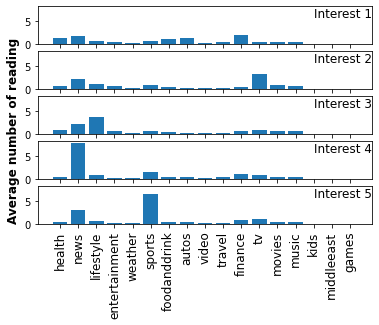

In [19]:


fig, axs = plt.subplots(5, sharex=True, sharey=True)
# fig.suptitle('Sharing both axes')
x = np.arange(17)
axs[0].bar(x, label_info_dict[0])
axs[0].set_title('Interest 1', loc='right', y=0.55, x=1)
axs[1].bar(x, label_info_dict[1])
axs[1].set_title('Interest 2', loc='right', y=0.55, x=1)
axs[2].bar(x, label_info_dict[2])
axs[2].set_title('Interest 3', loc='right', y=0.55, x=1)
axs[3].bar(x, label_info_dict[3])
axs[3].set_title('Interest 4', loc='right', y=0.55, x=1)
axs[4].bar(x, label_info_dict[4])
axs[4].set_title('Interest 5', loc='right', y=0.55, x=1)

plt.xticks(x, category2idx.keys(), rotation=90, fontsize=12)
plt.ylabel('Average number of reading', y=2.5, fontweight='bold', fontsize=12)
plt.savefig(f'pdf/stat_reading_len_center_point.pdf', bbox_inches='tight')


### TSNE

In [20]:
with open('/Users/qin/2022/NewsRec/temp/interests_20000_tsne.pkl', 'rb') as f:
    X_embedded = pickle.load(f)

In [21]:
interest_behavior_df['x1'] = X_embedded[:, 0]

/Users/qin/.pyenv/versions/3.6.8/envs/test-env-3.6.8/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
interest_behavior_df['x2'] = X_embedded[:, 1]

/Users/qin/.pyenv/versions/3.6.8/envs/test-env-3.6.8/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
interest_behavior_df.head()

,idx,uid,date,history,impression,labels,category_num_col,x1,x2
0,2,U231077,11/19/2019 5:28:08 AM,N45124 N84730 N45128 N104312 N70022 N99111 N26...,N14657 N51253 N49521 N126571 N74286 N101071 N1...,2,"[0.0, 3.0, 2.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, ...",-6.487731,1.730792
6,17,U36211,11/22/2019 11:09:00 PM,N65259 N81692 N11397 N76677 N24701 N5287 N1236...,N92450 N111382 N32454 N101867 N103387 N84276 N...,2,"[0.0, 2.0, 3.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",-53.718887,-29.801043
23,77,U363463,11/22/2019 5:04:54 PM,N38014 N85659 N65119 N14240 N52405 N83253 N112...,N115848 N124107 N22832 N94108 N106421 N103387 ...,0,"[10.0, 8.0, 2.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0,...",-51.752232,21.710484
41,134,U192357,11/17/2019 5:36:16 AM,N61319 N73122 N51893 N79285 N73120 N92079 N722...,N35994 N33607 N54666 N129869 N68662 N77433 N90...,3,"[0.0, 8.0, 2.0, 0.0, 1.0, 1.0, 0.0, 4.0, 0.0, ...",14.031358,40.329384
70,208,U729867,11/18/2019 12:55:10 PM,N48215 N25197 N3948 N107555 N113328 N91865,N101001 N20055 N65799 N78064 N32131 N86965 N11...,0,"[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, ...",29.542845,33.331688


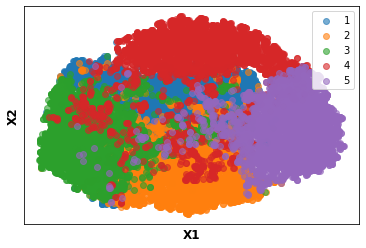

In [24]:
# maker = ['o', 'v', 's', 'D', 'H']
# colors = ['red', 'white', 'white', 'white', 'white']
labels = ['1', '2', '3', '4', '5']
for idx, l in enumerate(range(5)):
    x1 = interest_behavior_df.loc[interest_behavior_df['labels'] == l]['x1']
    x2 = interest_behavior_df.loc[interest_behavior_df['labels'] == l]['x2']
#     plt.scatter(x1, x2, marker=maker[idx], edgecolors=colors[idx], alpha=0.4)
    plt.scatter(x1, x2, alpha=0.6)

plt.xticks([])
plt.yticks([])
plt.xlabel('X1', fontweight='bold', fontsize=12)
plt.ylabel('X2', fontweight='bold', fontsize=12)
plt.legend(labels=labels)
plt.savefig(f'pdf/user_group_interest_tsne.pdf')